# Prime numbers

- Profiling and optimized implementation in Numba, >1000x faster!

- Why do prime numbers make these spirals? | Dirichlet’s theorem and pi approximations


<a href="https://colab.research.google.com/github/Ziaeemehr/workshop_hpcpy/blob/main/notebooks/numba/prime_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


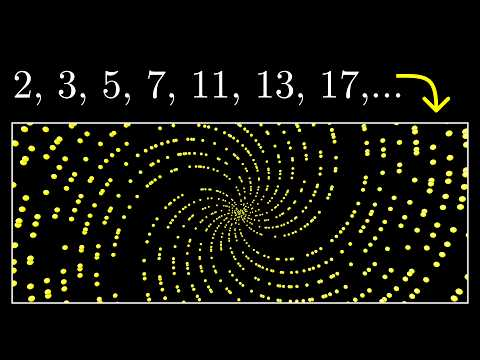

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EK32jo7i5LQ', width=800, height=450)

Pure python implementation

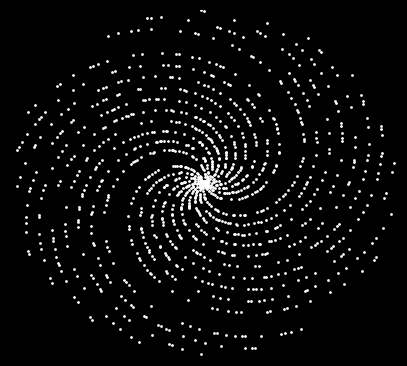

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def get_prime_numbers_py(upperbound):
    r = [x for x in range(2, upperbound) if 
                 all(x%i for i in range(2,x))]
    
    return r

def plot_numbers(numbers, upperbound, ax, s=1):
    # Vectorized computation of Cartesian coordinates
    angles = numbers  # Use prime numbers as angles
    radii = numbers   # Use prime numbers as radii
    x = radii * np.cos(angles)  # x = r * cos(theta)
    y = radii * np.sin(angles)  # y = r * sin(theta)
    
    ax.scatter(x, y, color='w', s=s)
    ax.set_xlim(-upperbound, upperbound)
    ax.set_ylim(-upperbound, upperbound)
    ax.set_axis_off()    
    
upperbound = 10000
prime_numbers = get_prime_numbers_py(upperbound)
fig, ax = plt.subplots(1, figsize=(5, 4.5), facecolor='black')
plot_numbers(prime_numbers, upperbound, ax)

- Optimizing the functions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

@njit
def get_prime_numbers_nb(upperbound):
    primes = []
    for x in range(2, upperbound):
        if is_prime(x):
            primes.append(x)
    return primes


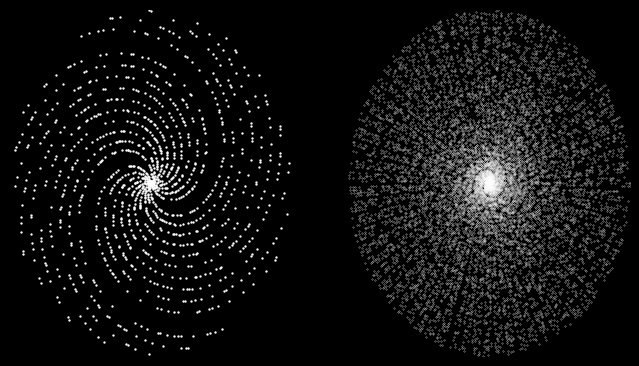

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4.5), facecolor='k')

upperbound = 10000
prime_numbers = get_prime_numbers_nb(upperbound)
plot_numbers(prime_numbers, upperbound, ax[0], s=0.5)

upperbound = 100000
prime_numbers = get_prime_numbers_nb(upperbound)
plot_numbers(prime_numbers, upperbound, ax[1], s=0.05)
plt.show()

In [5]:
upperbound = 10_000
%timeit get_prime_numbers_py(upperbound)
%timeit get_prime_numbers_nb(upperbound)

451 ms ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
342 μs ± 5.25 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
upperbound = 30_000
%timeit get_prime_numbers_py(upperbound)
%timeit get_prime_numbers_nb(upperbound)

3.55 s ± 148 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.49 ms ± 173 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
# install line_profiler
# ! conda install conda-forge::line_profiler -y

In [8]:
%load_ext line_profiler

In [9]:
%lprun -f get_prime_numbers_py get_prime_numbers_py(10_000)

Timer unit: 1e-09 s

Total time: 1.52891 s
File: /var/folders/c8/c_1wxlf15dsfskdjqlm1t1d80000gn/T/ipykernel_36809/3032063312.py
Function: get_prime_numbers_py at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def get_prime_numbers_py(upperbound):
     6         1 1528907000.0    2e+09    100.0      r = [x for x in range(2, upperbound) if 
     7                                                            all(x%i for i in range(2,x))]
     8                                               
     9         1       1000.0   1000.0      0.0      return r

In [10]:
%lprun -f get_prime_numbers_nb get_prime_numbers_nb(10_000)

/Users/tng/opt/anaconda3/envs/jitcsim/lib/python3.11/site-packages/line_profiler/ipython_extension.py:97: UserWarning: Adding a function with a __wrapped__ attribute. You may want to profile the wrapped function by adding get_prime_numbers_nb.__wrapped__ instead.
  profile = LineProfiler(*funcs)


Timer unit: 1e-09 s

Total time: 0 s
File: /var/folders/c8/c_1wxlf15dsfskdjqlm1t1d80000gn/T/ipykernel_36809/2101669563.py
Function: get_prime_numbers_nb at line 14

Line #      Hits         Time  Per Hit   % Time  Line Contents
    14                                           @njit
    15                                           def get_prime_numbers_nb(upperbound):
    16                                               primes = []
    17                                               for x in range(2, upperbound):
    18                                                   if is_prime(x):
    19                                                       primes.append(x)
    20                                               return primes